<a href="https://colab.research.google.com/github/Romek12345/prosta_analiza_R/blob/main/analiza3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("tidyverse")
install.packages("knitr")
install.packages("rmarkdown")
library(tidyverse)
library(knitr)
library(rmarkdown)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
# Wczytaj dane z plików CSV
dane <- read.csv("/content/dane1.csv")
dict_icd10 <- read.csv("/content/dict_icd101csv.csv")

# Wyświetl pierwsze kilka wierszy danych, aby upewnić się, że zostały załadowane prawidłowo
head(dane)
head(dict_icd10)


,ID_PACJ.ICD.10
,<chr>
1,2000299;1
2,3029983;3
3,4059667;2
4,5089351;4
5,6119035;3
6,7148719;2


,ICD.10.NAZWA.
,<chr>
1,1;choroba x;
2,2;rak;
3,3;katar;
4,4;kamien;
5,5;chorb;
6,6;kaszel ;


In [ ]:
dict_icd10 <- read.csv("/content/dict_icd101csv.csv", sep = ";")
dane <- read.csv("/content/dane1.csv", sep = ";")

In [ ]:
head(dane)
head(dict_icd10)

,ID_PACJ,ICD.10
,<int>,<int>
1,2000299,1
2,3029983,3
3,4059667,2
4,5089351,4
5,6119035,3
6,7148719,2


,ICD.10,NAZWA,X
,<int>,<chr>,<lgl>
1,1,choroba x,NA
2,2,rak,NA
3,3,katar,NA
4,4,kamien,NA
5,5,chorb,NA
6,6,kaszel,NA


In [ ]:
dane_merged <- merge(dane, dict_icd10, by.x = "ICD.10", by.y = "ICD.10")
head(dane_merged)

,ICD.10,ID_PACJ,NAZWA,X
,<int>,<int>,<chr>,<lgl>
1,1,2000299,choroba x,NA
2,2,4059667,rak,NA
3,2,7148719,rak,NA
4,2,1435650,rak,NA
5,3,3029983,katar,NA
6,3,1332682,katar,NA


In [ ]:
# Przenieś dane_merged do globalnego środowiska
assign("dane_merged", dane_merged, envir = .GlobalEnv)

head(dane_merged)

,ICD.10,ID_PACJ,NAZWA,X
,<int>,<int>,<chr>,<lgl>
1,1,2000299,choroba x,NA
2,2,4059667,rak,NA
3,2,7148719,rak,NA
4,2,1435650,rak,NA
5,3,3029983,katar,NA
6,3,1332682,katar,NA


In [ ]:
# Usunięcie kolumny 'X' z dict_icd10
dane_merged <- dane_merged[, !names(dane_merged) %in% "X"]


In [ ]:
head(dane_merged)

,ICD.10,ID_PACJ,NAZWA
,<int>,<int>,<chr>
1,1,2000299,choroba x
2,2,4059667,rak
3,2,7148719,rak
4,2,1435650,rak
5,3,3029983,katar
6,3,1332682,katar


In [ ]:
colnames(dane)
colnames(dict_icd10_cleaned)
head(dict_icd10_cleaned)

In [ ]:
unique(dane$ICD.10)
unique(dict_icd10_cleaned)

In [ ]:
str(dane$ICD.10)
str(dict_icd10_cleaned$ICD.10)

In [ ]:
dane$ICD.10 <- as.integer(dane$ICD.10)
dict_icd10_cleaned$ICD.10 <- as.integer(dict_icd10_cleaned$ICD.10)

In [ ]:
intersect(unique(dane$ICD.10), unique(dict_icd10_cleaned$ICD.10))

In [ ]:
dane_merged <- merge(dane, dict_icd10_cleaned, by.x = "ICD.10", by.y = "ICD.10")

dane_merged

In [ ]:
choroby_count <- dane_merged %>%
  group_by(NAZWA) %>%
  summarise(Liczba_wystapien = n()) %>%
  arrange(desc(Liczba_wystapien))

# Wyświetlenie tabeli z najczęstszymi chorobami
print(choroby_count)

# A tibble: 7 × 2
  NAZWA       Liczba_wystapien
  <chr>                  <int>
1 "chorb"                    3
2 "katar"                    3
3 "rak"                      3
4 "choroba x"                1
5 "jaskra"                   1
6 "kamien"                   1
7 "kaszel "                  1


In [ ]:
install.packages("kableExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘svglite’




In [ ]:
choroby_count %>%
  kable(caption = " Przyczyny pierwszej wizyty pacjenta w Polsce - 2023 rok (tys.)")



Table:  Najczęstsze choroby

|NAZWA     | Liczba_wystapien|
|:---------|----------------:|
|chorb     |                3|
|katar     |                3|
|rak       |                3|
|choroba x |                1|
|jaskra    |                1|
|kamien    |                1|
|kaszel    |                1|

In [ ]:
library(kableExtra)


Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows




In [ ]:
choroby_count %>%
  kable(caption = "Tabela: Przyczyny pierwszej wizyty pacjenta w Polsce - 2023 rok(tys.)") %>%
  kable_styling(bootstrap_options = c("striped", "hover", "condensed"),
                full_width = F,
                position = "center")
  footnote(general = "Źródło: Na podstawie danych Ministerstwa",
                general_title = "")


<table class="table table-striped table-hover table-condensed" style="width: auto !important; ">
<caption>Tabela: Najczęstsze choroby</caption>
 <thead>
  <tr>
   <th style="text-align:left;"> NAZWA </th>
   <th style="text-align:right;"> Liczba_wystapien </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> chorb </td>
   <td style="text-align:right;"> 3 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> katar </td>
   <td style="text-align:right;"> 3 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> rak </td>
   <td style="text-align:right;"> 3 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> choroba x </td>
   <td style="text-align:right;"> 1 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> jaskra </td>
   <td style="text-align:right;"> 1 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> kamien </td>
   <td style="text-align:right;"> 1 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> kaszel </td>
   <td style="text-align:right;"> 1 </td>
 

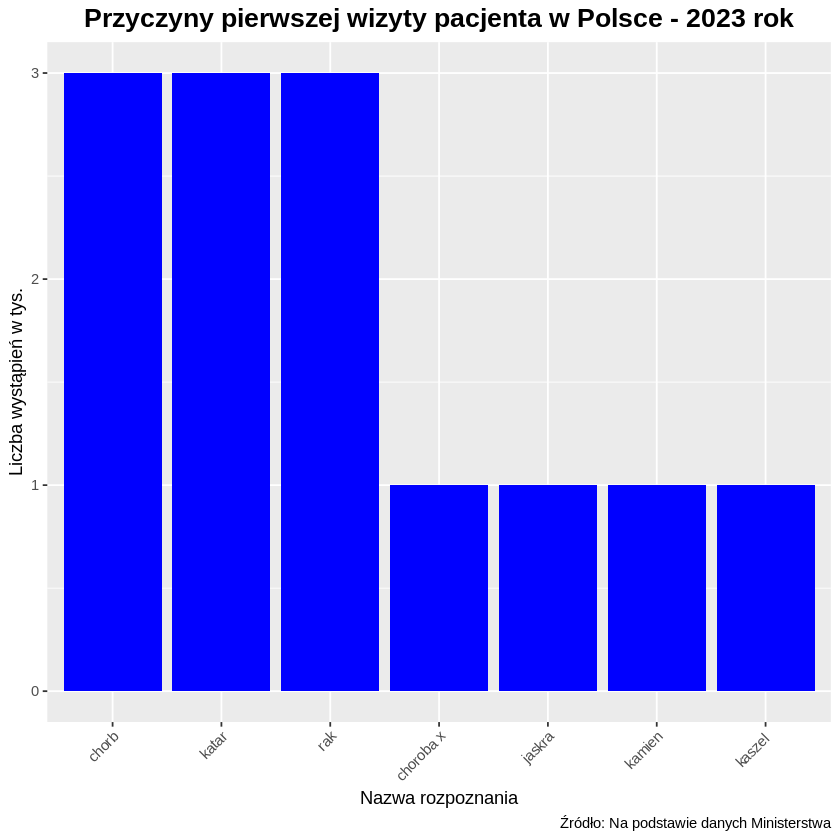

In [ ]:
ggplot(choroby_count, aes(x = reorder(NAZWA, -Liczba_wystapien), y = Liczba_wystapien)) +
  geom_bar(stat = "identity", fill = "blue") +  # Ustawienie koloru słupków
  labs(title = "Przyczyny pierwszej wizyty pacjenta w Polsce - 2023 rok", x = "Nazwa rozpoznania", y = "Liczba wystąpień w tys.",
       caption = "Źródło: Ministerstwo Zdrowia") +  # Dodanie źródła jako podpis
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1))

In [ ]:
system("apt-get install -y pandoc")

In [ ]:
rmarkdown::render("raport.Rmd")



processing file: raport.Rmd



1/2                  
2/2 [unnamed-chunk-1]


output file: raport.knit.md




/usr/bin/pandoc +RTS -K512m -RTS raport.knit.md --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output raport.html --lua-filter /usr/local/lib/R/site-library/rmarkdown/rmarkdown/lua/pagebreak.lua --lua-filter /usr/local/lib/R/site-library/rmarkdown/rmarkdown/lua/latex-div.lua --self-contained --variable bs3=TRUE --section-divs --template /usr/local/lib/R/site-library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable theme=bootstrap --mathjax --variable 'mathjax-url=https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' --include-in-header /tmp/RtmpNj4oes/rmarkdown-str191ab2c7e6.html 



Output created: raport.html

